<a href="https://colab.research.google.com/github/VANDANA-ANDE/vandana/blob/master/DimentionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
x,y=load_wine(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.2,
                                               random_state=1,
                                               stratify=y)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(142, 13) (142,)
(36, 13) (36,)


In [5]:
std_scaler=StandardScaler()
x_train_std=std_scaler.fit_transform(x_train)
x_test_std=std_scaler.transform(x_test)
print(np.unique(y))

[0 1 2]


In [0]:
pca=PCA(n_components=2)
x_train_pca=pca.fit_transform(x_train_std)
x_test_pca=pca.transform(x_test_std)


In [8]:
print(x_train_pca.shape,x_test_pca.shape)

(142, 2) (36, 2)


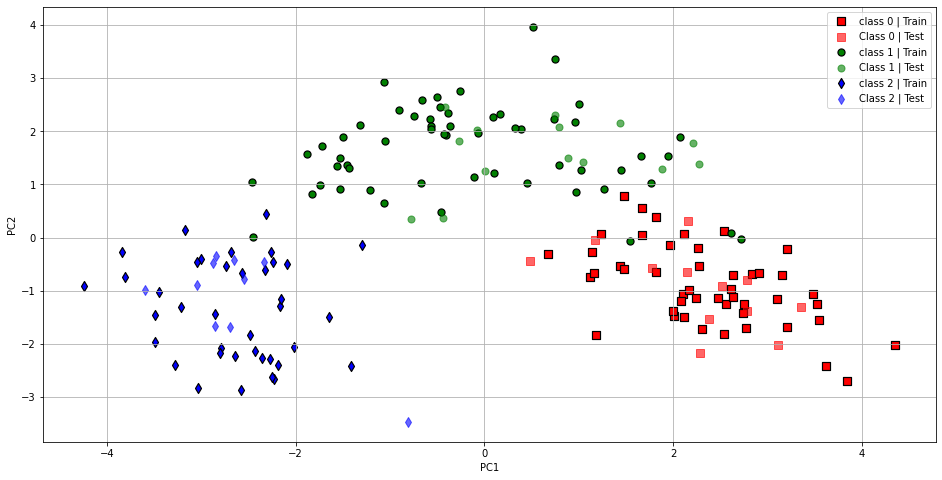

In [15]:
markers=['s','o','d']
colors=['red','green','blue']
plt.figure(figsize=(16,8))
for idx,cls in enumerate(np.unique(y)):
  plt.scatter(x_train_pca[y_train==cls,0],
              x_train_pca[y_train==cls,1],
              edgecolor='black',
              linewidth=1.2,
              s=50,
              marker=markers[idx],
              c=colors[idx],
              label='class {} | Train'.format(cls))
  plt.scatter(x_test_pca[y_test==cls,0],
              x_test_pca[y_test==cls,1],
              s=50,
              alpha=0.6,
              marker=markers[idx],
              c=colors[idx],
              label='Class {} | Test'.format(cls))
plt.grid()
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()